# Prever o gasto de combustivel de um carro baseado em suas caracteristicas


## Importando bibliotecas

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Load the data

In [38]:
# Read the dataset from auto-mpg.data
df = pd.read_csv(
    "auto-mpg.data",
    delim_whitespace=True,
    header=None,
    names=[
        "mpg",
        "cylinders",
        "displacement",
        "horsepower",
        "weight",
        "acceleration",
        "model year",
        "origin",
        "car name",
    ],
)

df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


## Data exploration

In [39]:
# describe the dataset
df.describe()


,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [40]:
# Check variable types
df.dtypes


mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [41]:
# Check for missing values
df.isnull().sum()


mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

## Data preparation

In [42]:
# Remove car name from the dataset
df = df.drop("car name", axis=1)

In [46]:
# Convert horsepower to float
df["horsepower"] = pd.to_numeric(df["horsepower"], errors="coerce")

# Check horsepower dtype
df["horsepower"].dtypes

dtype('float64')

In [47]:
# Check if there are any missing values
df["horsepower"].isnull().sum()

6

In [48]:
# Put the missing values as the mean of the column
df["horsepower"] = df["horsepower"].fillna(df["horsepower"].mean())


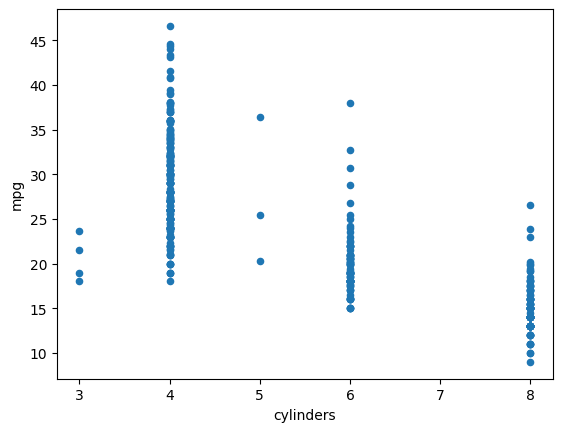

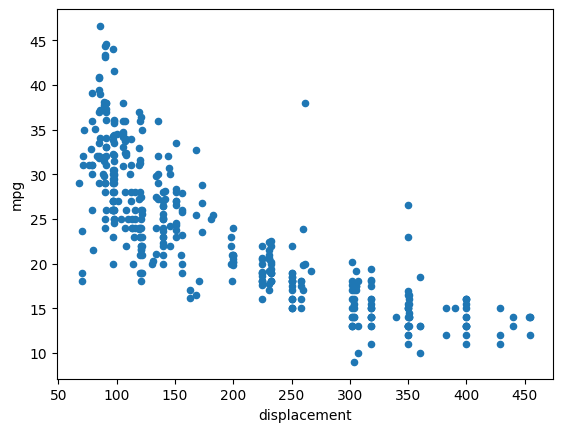

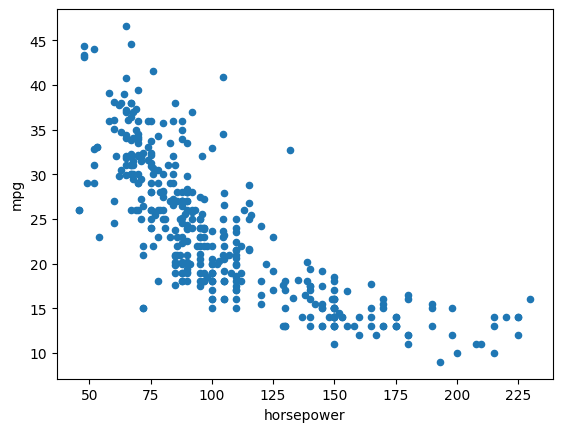

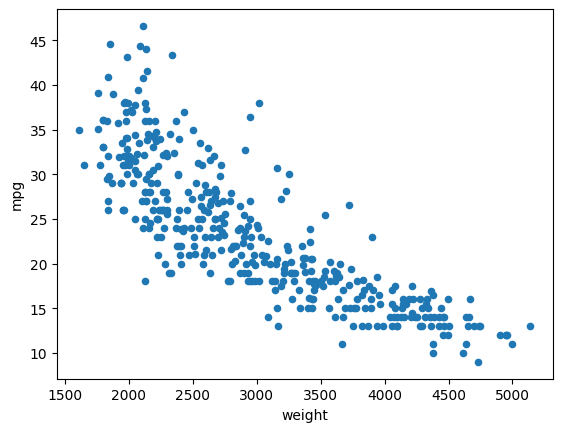

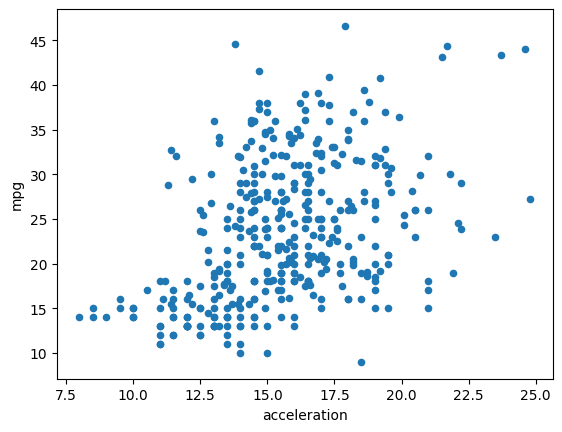

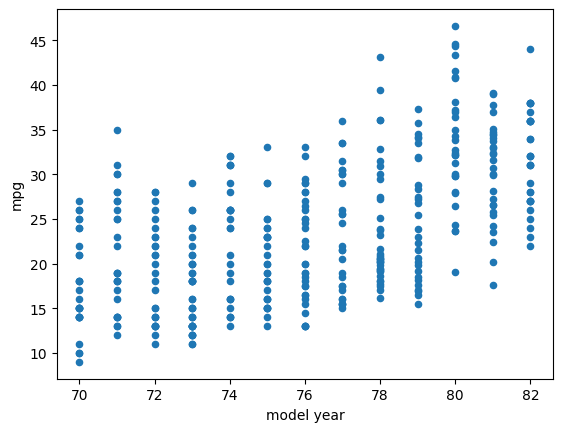

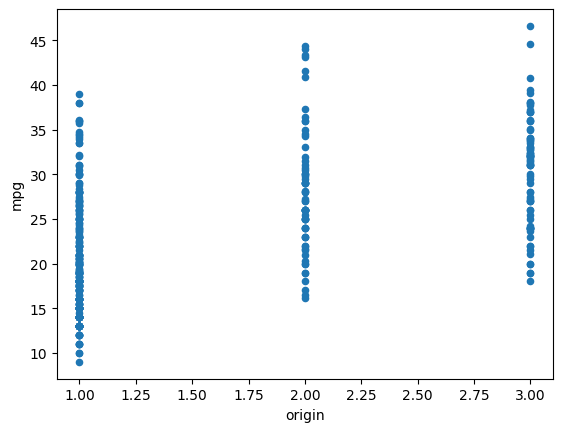

In [49]:
# Plot the distribution of the target variable


def scatter_all_columns_from_df(df: pd.DataFrame) -> None:
    """Scatter plot all columns from a dataframe"""
    for column in df.columns:
        if column == "mpg":
            continue
        df.plot.scatter(x=column, y="mpg")



scatter_all_columns_from_df(df)

## Model training

In [58]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut


In [52]:
# Split the dataset into train and test
X = df.drop("mpg", axis=1)
y = df["mpg"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [53]:
# Train the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [63]:
# Predict on the test set
y_pred = rf.predict(X_test)
y_pred

array([30.892, 29.438, 20.131, 14.767, 14.19 , 25.545, 26.151, 11.85 ,
       17.895, 19.14 , 13.76 , 33.768, 27.916, 14.53 , 25.06 , 12.18 ,
       29.47 , 19.067, 15.484, 35.779, 24.016, 19.252, 29.85 , 28.664,
       16.255, 38.242, 24.962, 24.674, 19.78 , 12.465, 27.373, 34.474,
       18.314, 24.492, 38.186, 13.47 , 21.949, 18.613, 14.639, 26.114,
       25.728, 28.429, 20.831, 11.27 , 23.491, 35.341, 26.228, 22.701,
       24.381, 27.039, 22.82 , 34.512, 33.029, 12.69 , 26.068, 13.25 ,
       16.468, 30.086, 24.048, 19.401, 14.195, 30.557, 24.483, 20.563,
       19.042, 25.279, 23.51 , 34.815, 26.792, 14.555, 34.879, 14.28 ,
       13.695, 18.704, 28.052, 20.969, 18.826, 29.363, 28.615, 17.49 ])

In [55]:
# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

RMSE: 2.143801


In [68]:
# Get cross validation score
scores = cross_val_score(rf, X, y, cv=LeaveOneOut(), scoring="neg_mean_squared_error")

# Calculate the RMSE
rmse = np.sqrt(-scores)
print("RMSE: %f" % (rmse.mean()))


RMSE: 1.866550


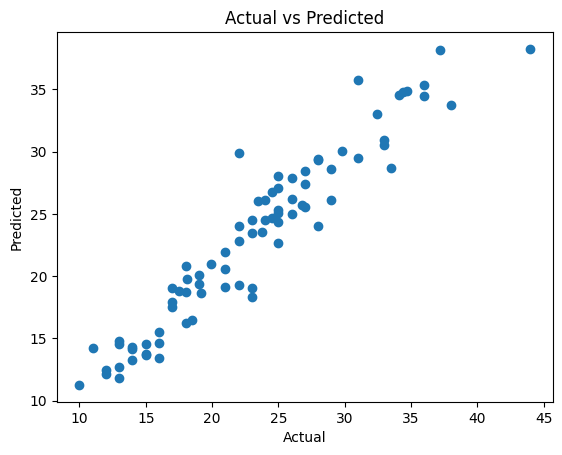

In [65]:
def plot_prediction(y_test, y_pred):
    """Plot the prediction"""
    import matplotlib.pyplot as plt

    plt.scatter(y_test, y_pred)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title("Actual vs Predicted")
    plt.show()


plot_prediction(y_test, y_pred)


## Enhancing the model


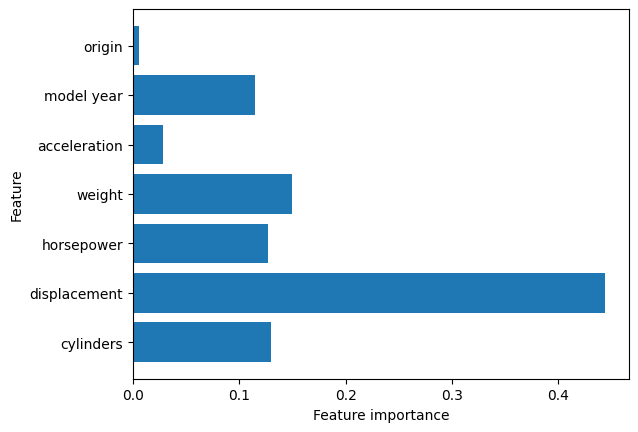

In [70]:
# Plot the feature importance
def plot_feature_importance(model, X):
    """Plot the feature importance"""
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.show()


plot_feature_importance(rf, X)

In [76]:
# Removing the least 2 important features
sorted_importance = sorted(
    zip(map(lambda x: round(x, 4), rf.feature_importances_), X.columns),
    reverse=True,
)


# Remove the least 2 important features using the sorted importance
X = df.drop([sorted_importance[-1][1], sorted_importance[-2][1]], axis=1)
y = df["mpg"]


In [77]:
# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)
y_pred

array([32.875, 28.014, 19.004, 13.   , 14.   , 27.   , 24.002, 12.87 ,
       16.979, 21.012, 14.94 , 37.93 , 25.994, 14.995, 25.037, 12.01 ,
       30.966, 16.944, 16.005, 31.01 , 22.057, 22.036, 21.982, 33.586,
       18.021, 43.854, 26.002, 24.202, 18.063, 12.07 , 27.02 , 35.972,
       23.046, 24.   , 37.324, 16.005, 21.066, 19.229, 16.   , 29.011,
       26.652, 27.016, 18.   , 10.61 , 22.999, 36.02 , 25.979, 25.049,
       25.007, 25.   , 22.057, 34.129, 32.354, 12.92 , 23.605, 14.   ,
       18.489, 29.926, 28.004, 19.   , 11.06 , 32.875, 23.003, 21.014,
       23.007, 25.022, 23.82 , 34.452, 24.197, 13.   , 34.552, 14.   ,
       14.94 , 18.   , 25.069, 19.922, 17.505, 28.029, 29.011, 16.973])

In [78]:
# Calculate the RMSE with cross validation
scores = cross_val_score(rf, X, y, cv=LeaveOneOut(), scoring="neg_mean_squared_error")

# Calculate the RMSE
rmse = np.sqrt(-scores)
print("RMSE: %f" % (rmse.mean()))

RMSE: 0.060724
